# Data Diri

Nama : Sahrial Ihsani Ishak

Asal : Bengkulu

# Build LSTM Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Library
import pandas as pd #Pandas to process dataset
from sklearn.model_selection import train_test_split #split dataset into training and validation  
from tensorflow.keras.preprocessing.text import Tokenizer #make tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #make sequences
import tensorflow as tf #tensorflow 

In [3]:
#read dataset
dataset = pd.read_csv('/content/drive/MyDrive/news.csv')
display(dataset.head())

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
#drop category and split category
kategori_berita = pd.get_dummies(dataset.category)
dataset_baru = pd.concat([dataset, kategori_berita], axis=1)
dataset_baru = dataset_baru.drop(columns='category')
dataset_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [5]:
#preparing text and label
teks = dataset_baru['text'].values
label = dataset_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [6]:
#Divide the dataset into train and validation
teks_latih, teks_test, label_latih, label_test = train_test_split(teks, label, test_size=0.2)

In [7]:
#create tokenizer and padding
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(teks_latih) 
tokenizer.fit_on_texts(teks_test)
word_index = tokenizer.word_index
sekuens_latih = tokenizer.texts_to_sequences(teks_latih)
sekuens_test = tokenizer.texts_to_sequences(teks_test)
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [8]:
#Callback to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah lebih dari 95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [9]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
plot_model = model.fit(padded_latih, label_latih, epochs=30, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
56/56 - 153s - loss: 1.6150 - accuracy: 0.2562 - val_loss: 1.5824 - val_accuracy: 0.3798
Epoch 2/30
56/56 - 150s - loss: 1.2537 - accuracy: 0.5657 - val_loss: 0.8537 - val_accuracy: 0.6539
Epoch 3/30
56/56 - 150s - loss: 0.4785 - accuracy: 0.8219 - val_loss: 0.4908 - val_accuracy: 0.8135
Epoch 4/30
56/56 - 151s - loss: 0.2661 - accuracy: 0.9056 - val_loss: 0.6115 - val_accuracy: 0.7708
Epoch 5/30
56/56 - 151s - loss: 0.1094 - accuracy: 0.9708 - val_loss: 0.6692 - val_accuracy: 0.8180

Akurasi telah lebih dari 95%!


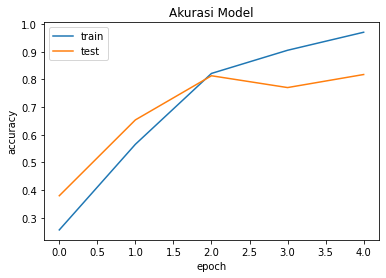

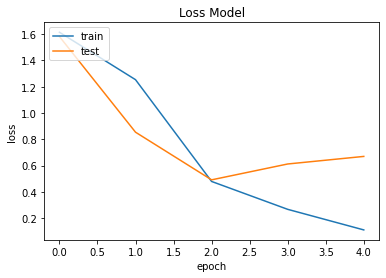

In [11]:
import matplotlib.pyplot as plt
#Accuracy  
plt.plot(plot_model.history['accuracy'])
plt.plot(plot_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(plot_model.history['loss'])
plt.plot(plot_model.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()